In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [17]:
# Load the dataset
file_path = 'mutagenicity_kNN 2.csv'  # Update with your file path
dataset = pd.read_csv(file_path)
dataset


,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,5759,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,5760,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,5761,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,5762,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


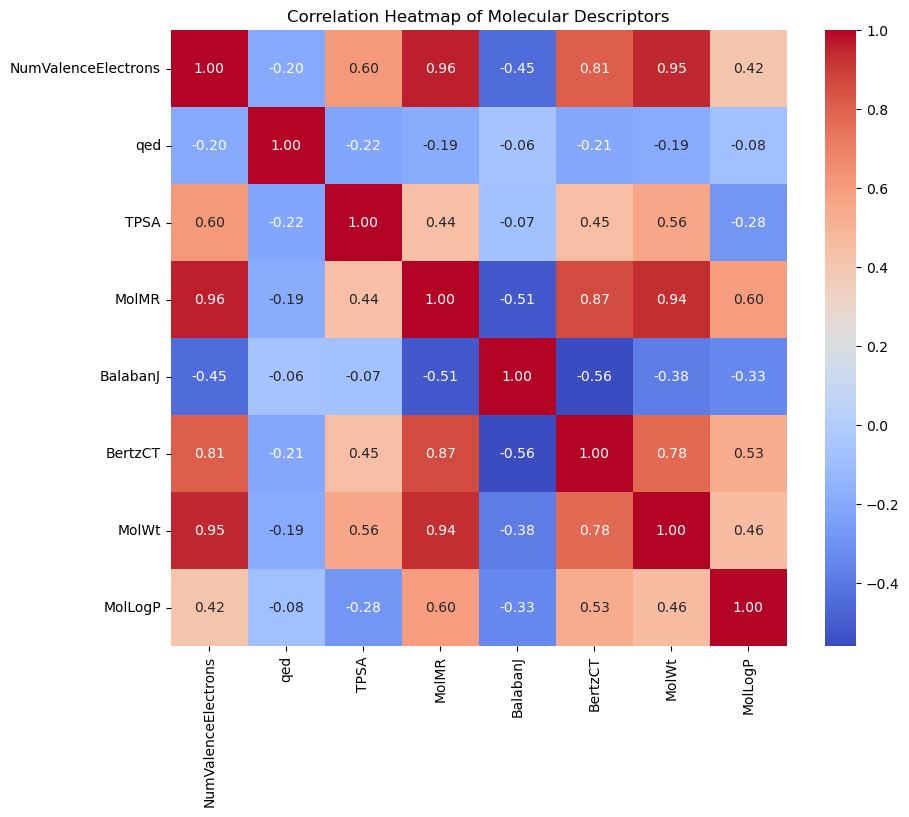

In [13]:

# Compute the correlation matrix for the features
correlation_matrix = pd.DataFrame(X, columns=data_cleaned.drop(columns=["Experimental value"]).columns).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Molecular Descriptors")
plt.show()


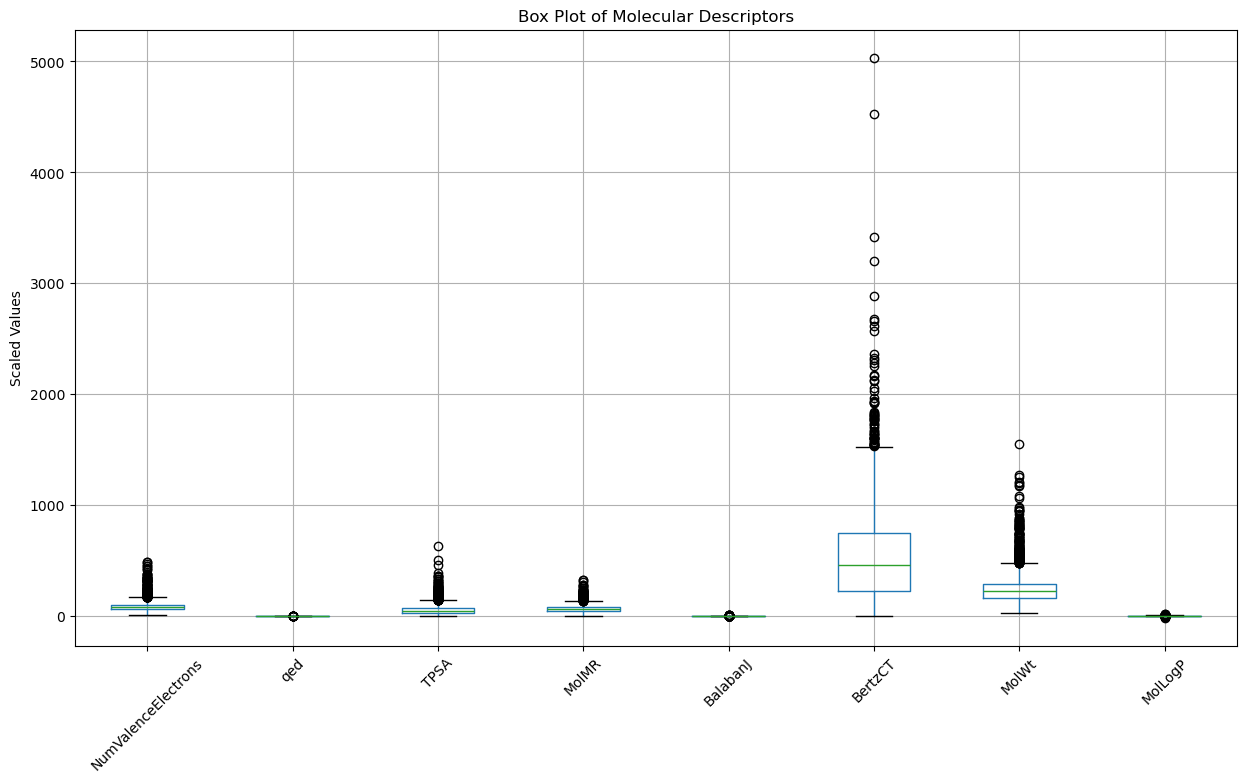

In [18]:
features_df = pd.DataFrame(X, columns=data_cleaned.drop(columns=["Experimental value"]).columns)

# Plot box plots for all features
plt.figure(figsize=(15, 8))
features_df.boxplot()
plt.title("Box Plot of Molecular Descriptors")
plt.xticks(rotation=45)
plt.ylabel("Scaled Values")
plt.show()


In [14]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Predicted value']
data_cleaned = dataset.drop(columns=columns_to_drop)

# Separate features (X) and target (y)
X = data_cleaned.drop(columns=['Experimental value'])
y = data_cleaned['Experimental value']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)



In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Define the kNN classifier and hyperparameter grid
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}  # Testing k from 1 to 20

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameter k and corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_f1_score = grid_search.best_score_

# Train the final kNN model with the best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Evaluate on the test set
y_pred = knn_final.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)

# Classification report
classification_rep = classification_report(y_test, y_pred)



In [16]:
# Display results
print(f"Best k: {best_k}")
print(f"Best F1-score (cross-validation): {best_f1_score:.4f}")
print(f"Test F1-score: {test_f1_score:.4f}")
print("\nClassification Report:\n", classification_rep)


Best k: 19
Best F1-score (cross-validation): 0.7461
Test F1-score: 0.7520

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.64       503
           1       0.72      0.79      0.75       650

    accuracy                           0.71      1153
   macro avg       0.70      0.70      0.70      1153
weighted avg       0.71      0.71      0.70      1153

